In [38]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [2]:
url = 'https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv'

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1


In [5]:
data.shape

(64, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   expr    64 non-null     float64
 1   age     64 non-null     int64  
 2   dose    64 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [7]:
data.describe()

,expr,age
count,64.000000,64.000000
mean,103.395691,1.500000
std,5.353458,0.503953
min,90.918788,1.000000
25%,100.500687,1.000000
50%,103.696660,1.500000
75%,106.845715,2.000000
max,114.993803,2.000000


In [8]:
data.boxplot('expr', by='dose', figsize=(10,7), grid=True);

In [9]:
data['expr'] = pd.to_numeric(data['expr'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   expr    64 non-null     float64
 1   age     64 non-null     int64  
 2   dose    64 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
A = data[(data['age']==1)&(data['dose']=='D1')]['expr']
B = data[(data['age']==1)&(data['dose']=='D2')]['expr']
C = data[(data['age']==2)&(data['dose']=='D1')]['expr']
D = data[(data['age']==2)&(data['dose']=='D2')]['expr']

In [20]:
stats.levene(A,B,C,D, center='mean')

LeveneResult(statistic=0.19520719910270787, pvalue=0.8992648225029773)

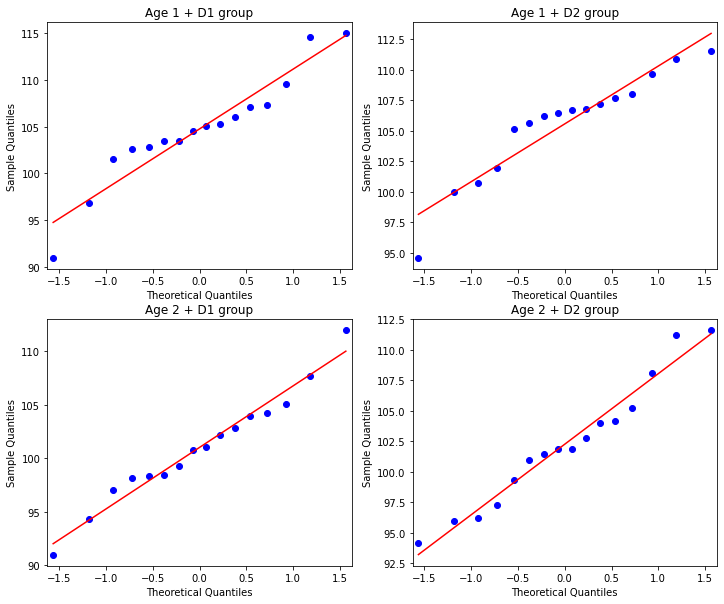

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

ax1.set_title('Age 1 + D1 group')
qqplot(A, line='r', ax=ax1)

ax2.set_title('Age 1 + D2 group')
qqplot(B, line='r', ax=ax2)

ax3.set_title('Age 2 + D1 group')
qqplot(C, line='r', ax=ax3)

ax4.set_title('Age 2 + D2 group')
qqplot(D, line='r', ax=ax4)

plt.show()
